30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
#MeCabをインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
# apt install mecab : 形態素解析を行う本体をインストール
# libme-dev : Mecabをプログラムで使うための開発用ライブラリ
# mecab-ipadic-utf8 : 日本語の単語データ（辞書）をインストール

!pip install unidic-lite
# pythonからmecabを使うための乱ライブラリをインストール

#形態素解析
# mecab : Mecabを実行
# ./neko.txt : 解析する文章が入っているファイル
# -o ./neko.txt.mecab　解析結果をファイルに保存
!mecab ./neko.txt -o ./neko-1.txt.mecab

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 22 not upgraded.
Need to get 7,367 kB of archives.
After this operation, 59.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab2 amd64 0.996-14build9 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab-dev amd64 0.996-14build9 [306 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-utils amd64 0.996-14build9 [4,850 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-ipadic all 2.7.0-20070801+main-3 [6,718 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab amd64 0.996-14build9 [136 kB]
Get:6 http://archive.ubuntu.co

In [ ]:
# 30
# 全情報を表示する「-Odump」では、品詞や活用形など合わせて10種類の情報を一気に取得可能
# 表層形：活用や表記揺れを考慮した、文章中で使用される単語形式
# 品詞：単語を文法上の形態や役割などから、「動詞・名詞・形容詞・形容動詞・副詞・連体詞・接続詞・感動詞・助動詞・助詞」へ分類したもの
# 品詞細分類1～3：辞書の品詞体系に基づいて品詞の属性をさらに分類したもの（名詞の場合には、固有名詞・人名・一般・組織・地域など）
# 活用型：単語の活用の仕方を分類したもの（動詞の場合は「五段活用・上一段活用・下一段活用・カ行変格活用・サ行変格活用」）
# 活用形：活用している動詞・形容詞・形容動詞・助動詞を「未然形・連用形・終止形・連体形・仮定形・命令形」へ分類したもの
# 原形：活用前の形式
# 読み方：単語のフリガナ（学習→ガクシュウ）
# 発音：日本語で発音する方法（学習→ガクシュー）

# 今回は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）が必要

def load_mecab_result(file_path):
    sentences = []  # すべての文を格納するリスト
    sentence = []   # 1つの文の形態素リスト

    with open(file_path, 'r', encoding='utf-8') as f: # 解析結果ファイルを開く
        for line in f: # ファイルを一行ずつ読み込み
            line = line.strip() # 余計な空白や改行を削除
            if line == 'EOS':  # 文の終わり
                if sentence:
                    sentences.append(sentence)
                    sentence = [] # 次の文章のためにセット
                continue

            # Mecabの出力は、単語\t詳細　となっている
            # MeCabの出力フォーマット: 表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用形,活用型,基本形,読み,発音
            parts = line.split('\t') # \tが区切りなので分割
            if len(parts) != 2:
                continue
            surface = parts[0] # surface は表層形といい、元の単語を表す
            details = parts[1].split(',') # 品詞などの情報をカンマで分割

            morph = {
                'surface': surface, # 元の単語
                'base': details[6] if len(details) > 6 else '*', # 基本形
                'pos': details[0], # 品詞
                'pos1': details[1] # 品詞の細かい分類
            }

            sentence.append(morph)

    return sentences

# 使用例
file_path = 'neko-1.txt.mecab'  # 解析済みのMeCab出力ファイル
sentences = load_mecab_result(file_path)

# 例として最初の2文を出力
for i, sentence in enumerate(sentences[:2]):
    print(f"--- Sentence {i} ---")
    for morph in sentence:
        print(morph)


--- Sentence 0 ---
{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}
--- Sentence 1 ---
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


https://mathcommunication.hatenablog.com/entry/2017/08/13/173937

31. 動詞

動詞の表層形をすべて抽出せよ．

In [ ]:
for i, sentence in enumerate(sentences[:5]):
    print(f"--- Sentence {i} ---")
    for morph in sentence:
      if morph['pos'] == '動詞':
        print(morph)

--- Sentence 0 ---
--- Sentence 1 ---
--- Sentence 2 ---
--- Sentence 3 ---
{'surface': '生れ', 'base': '生れる', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'つか', 'base': 'つく', 'pos': '動詞', 'pos1': '自立'}
--- Sentence 4 ---
{'surface': 'し', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}
{'surface': '泣い', 'base': '泣く', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'し', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}
{'surface': 'いる', 'base': 'いる', 'pos': '動詞', 'pos1': '非自立'}


32. 動詞の基本形

動詞の基本形をすべて抽出せよ．

In [ ]:
for i, sentence in enumerate(sentences[:5]):
    print(f"--- Sentence {i} ---")
    for morph in sentence:
      if morph['pos'] == '動詞':
        print('base', morph['base'])

--- Sentence 0 ---
--- Sentence 1 ---
--- Sentence 2 ---
--- Sentence 3 ---
base 生れる
base つく
--- Sentence 4 ---
base する
base 泣く
base する
base いる


33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．


In [ ]:
def extract_noun_phrases(sentences):
    noun_phrases = []

    for sentence in sentences:
        prev_noun = None  # 直前の名詞
        for morph in sentence:
            surface = morph['surface']
            pos = morph['pos']
            pos1 = morph['pos1']

            # 名詞が連続している場合
            if pos == '名詞':
                if prev_noun:  # 直前の単語が名詞であれば
                    if prev_noun + "の" + surface:  # 直前の名詞 + の + 現在の名詞
                        noun_phrases.append(prev_noun + "の" + surface)
                prev_noun = surface  # 現在の名詞を保存
            elif pos == '助詞' and surface == 'の':  # 「の」なら何もしない
                pass
            else:
                prev_noun = None  # 名詞でない場合は、直前の名詞をリセット

    return noun_phrases

# 名詞句を抽出
noun_phrases = extract_noun_phrases(sentences)

# 結果を表示
print("\n".join(noun_phrases[:5]))

人間の中
一番の獰悪
彼の掌
掌の上
書生の顔


34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
# MeCabの解析結果を読み込む
with open("neko-1.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.readlines()

noun_phrases = []  # 名詞連接を格納するリスト
current_noun_phrase = []  # 連続する名詞を保持するリスト

for line in lines:
    if line == "EOS\n":  # 文の区切り
        if current_noun_phrase:  # 連続した名詞があればリストに追加
            noun_phrases.append("".join(current_noun_phrase))
            current_noun_phrase = []
        continue

    cols = line.split("\t")
    if len(cols) < 2:
        continue

    details = cols[1].split(",")
    if details[0] == "名詞":  # 名詞なら追加
        current_noun_phrase.append(cols[0])
    else:  # 名詞以外ならリストに追加してリセット
        if current_noun_phrase:
            noun_phrases.append("".join(current_noun_phrase))
            current_noun_phrase = []

# 結果を出力
print("\n".join(noun_phrases[:5]))


一
吾輩
猫
名前
どこ


35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
import re

# MeCabの解析結果を読み込む
with open("neko-1.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.readlines()

noun_phrases = []
current_noun_phrase = []

for line in lines:
    if line == "EOS\n":  # 文末を表すEOS
        if current_noun_phrase:  # 連続した名詞があればリストに追加
            noun_phrases.append("".join(current_noun_phrase))
            current_noun_phrase = []
        continue

    cols = line.split("\t")
    if len(cols) < 2:
        continue

    details = cols[1].split(",")
    if details[0] == "名詞":  # 名詞ならリストに追加
        current_noun_phrase.append(cols[0])
    else:
        if current_noun_phrase:
            noun_phrases.append("".join(current_noun_phrase))
            current_noun_phrase = []

# 重複を除いて出現頻度順にソート
noun_phrases_freq = {}
for phrase in noun_phrases:
    noun_phrases_freq[phrase] = noun_phrases_freq.get(phrase, 0) + 1

sorted_noun_phrases = sorted(noun_phrases_freq.items(), key=lambda x: x[1], reverse=True)

# 上位10件を表示
for phrase, freq in sorted_noun_phrases[:10]:
    print(f"{phrase}: {freq}")


の: 1564
事: 1176
もの: 968
主人: 896
よう: 681
ん: 656
何: 455
吾輩: 445
これ: 383
人: 345


36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=3fa5a241ef8db86ac22bc0549242084d4ee9a741f93c7f8a35873759a63795e2
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


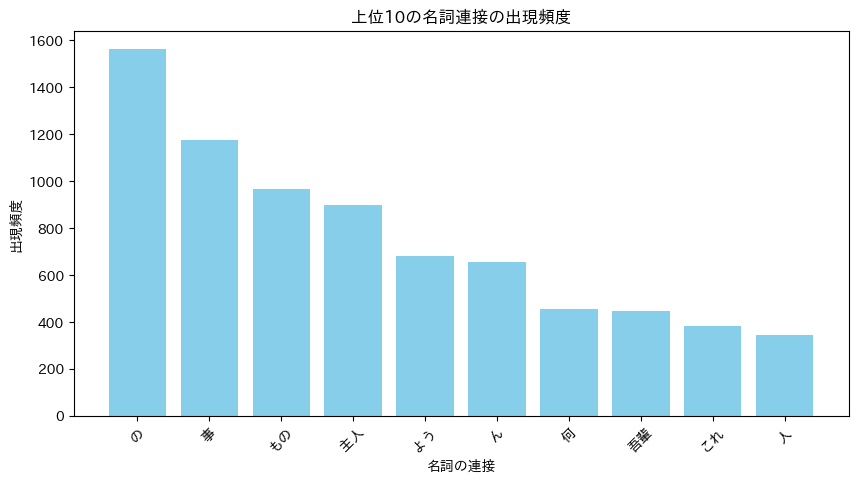

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import japanize_matplotlib  # 日本語対応

# MeCabの解析結果を読み込む
with open("neko-1.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.readlines()

noun_phrases = []  # 名詞連接を格納するリスト
current_noun_phrase = []  # 連続する名詞を保持するリスト

for line in lines:
    if line == "EOS\n":  # 文の区切り
        if current_noun_phrase:  # 連続した名詞があればリストに追加
            noun_phrases.append("".join(current_noun_phrase))
            current_noun_phrase = []
        continue

    cols = line.split("\t")
    if len(cols) < 2:
        continue

    details = cols[1].split(",")
    if details[0] == "名詞":  # 名詞なら追加
        current_noun_phrase.append(cols[0])
    else:  # 名詞以外ならリストに追加してリセット
        if current_noun_phrase:
            noun_phrases.append("".join(current_noun_phrase))
            current_noun_phrase = []

# 名詞連接の出現頻度をカウント
noun_counts = Counter(noun_phrases)

# 上位10件を取得
top_nouns = noun_counts.most_common(10)

# データを分解
words, counts = zip(*top_nouns)

# グラフの描画
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel("名詞の連接")
plt.ylabel("出現頻度")
plt.title("上位10の名詞連接の出現頻度")
plt.xticks(rotation=45)
plt.show()


37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

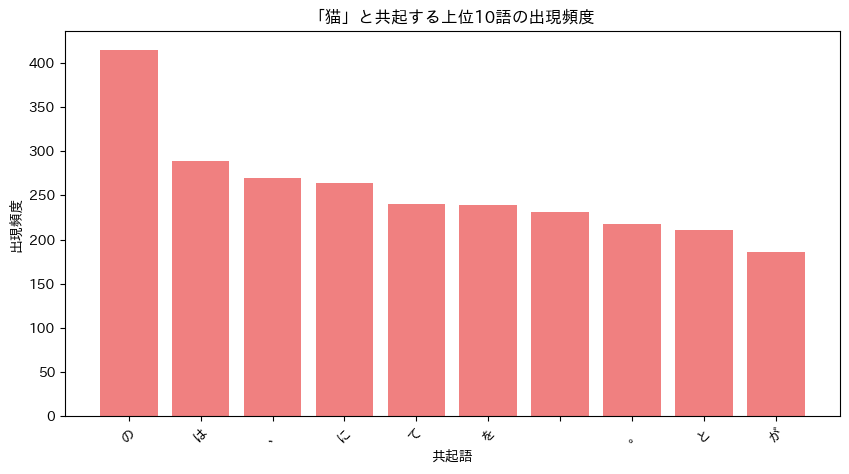

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import japanize_matplotlib  # 日本語対応

# MeCabの解析結果を読み込む
with open("neko-1.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.read().split("EOS\n")  # 文ごとに分割

co_occurrence = Counter()  # 共起語の頻度をカウント

for sentence in lines:
    if "猫" in sentence:  # 文中に「猫」が含まれているかチェック
        words = [line.split("\t")[0] for line in sentence.split("\n") if "\t" in line]
        co_occurrence.update(words)

# 「猫」自体を除外
co_occurrence.pop("猫", None)

# 上位10語を取得
top_co_words = co_occurrence.most_common(10)
words, counts = zip(*top_co_words)

# グラフの描画
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='lightcoral')
plt.xlabel("共起語")
plt.ylabel("出現頻度")
plt.title("「猫」と共起する上位10語の出現頻度")
plt.xticks(rotation=45)
plt.show()


38. ヒストグラム

単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

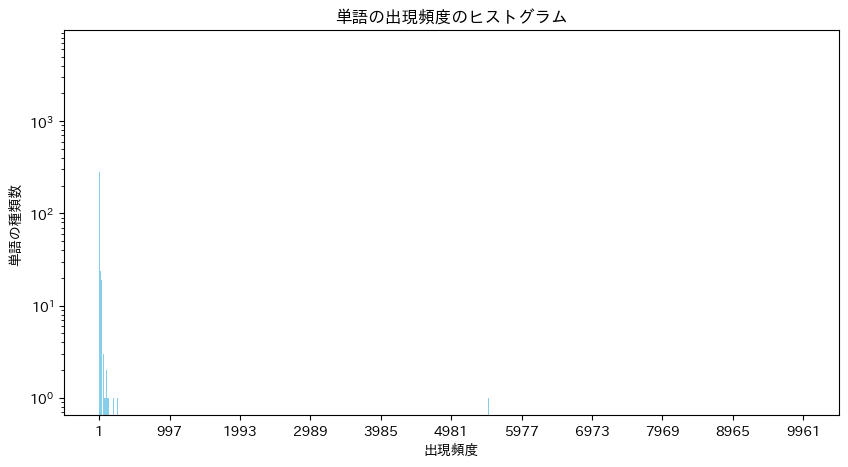

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import japanize_matplotlib  # 日本語対応

# MeCabの解析結果を読み込む
with open("neko-1.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.readlines()

words = []  # 単語リスト

for line in lines:
    if line == "EOS\n":
        continue

    cols = line.split("\t")
    if len(cols) < 2:
        continue

    word = cols[0]  # 単語本体
    words.append(word)

# 単語の出現頻度をカウント
word_counts = Counter(words)

# 出現頻度ごとに単語の種類数を集計
freq_dist = Counter(word_counts.values())

# データの準備（X: 出現頻度, Y: その頻度を持つ単語数）
x_vals = list(freq_dist.keys())
y_vals = list(freq_dist.values())

# ヒストグラムの描画
plt.figure(figsize=(10, 5))
plt.bar(x_vals, y_vals, color='skyblue')
plt.xlabel("出現頻度")
plt.ylabel("単語の種類数")
plt.title("単語の出現頻度のヒストグラム")
plt.xticks(range(1, max(x_vals) + 1, max(1, max(x_vals) // 10)))  # 目盛り調整
plt.yscale("log")  # 縦軸を対数スケールに（頻度分布が偏るため）
plt.show()


39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

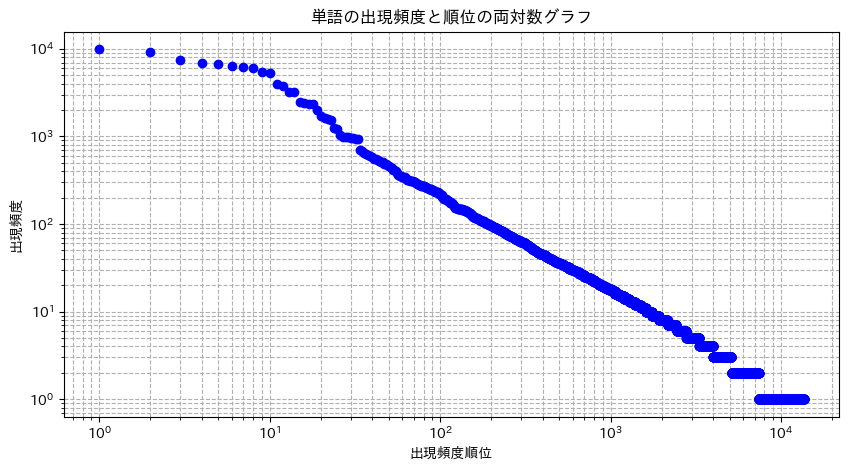

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import japanize_matplotlib  # 日本語対応

# MeCabの解析結果を読み込む
with open("neko-1.txt.mecab", "r", encoding="utf-8") as f:
    lines = f.readlines()

words = []  # 単語リスト

for line in lines:
    if line == "EOS\n":
        continue

    cols = line.split("\t")
    if len(cols) < 2:
        continue

    word = cols[0]  # 単語本体
    words.append(word)

# 単語の出現頻度をカウント
word_counts = Counter(words)

# 出現頻度順にソート
sorted_counts = sorted(word_counts.values(), reverse=True)

# 順位（1位, 2位, 3位...）を作成
ranks = list(range(1, len(sorted_counts) + 1))

# 両対数グラフをプロット
plt.figure(figsize=(10, 5))
plt.loglog(ranks, sorted_counts, marker="o", linestyle="none", color="b")  # 対数スケール
plt.xlabel("出現頻度順位")
plt.ylabel("出現頻度")
plt.title("単語の出現頻度と順位の両対数グラフ")
plt.grid(True, which="both", linestyle="--")  # グリッド追加
plt.show()
